In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np 
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
import ipaddress
import glob
import os
#import tensorflow as tf
#import tensorflow.keras as keras
from sklearn.model_selection import train_test_split as tts      
from sklearn.preprocessing import StandardScaler as SS
from sklearn.metrics import confusion_matrix as CM 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score as AS
from sklearn.linear_model import LinearRegression as LR
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.tree import DecisionTreeClassifier as dtc
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn import tree 

In [25]:
#DATA PROCESSING#

#Include all .csv files in directory of this code #

all_files = glob.glob("data/*.csv")
print(all_files)
li = []
#print(path)
data = pd.concat((pd.read_csv(f,index_col='No.') for f in all_files),ignore_index=True)

#Init Website Target#
data['Website'] = 100

#Website Target Labels and IP Addresses#
#SINGLE UP DOWN #

# (1-4) Amazon = 1
amaz_src_dest = ["18.160.17.214","18.165.77.79"] #TCP
data.loc[data['Source'] == amaz_src_dest[0],'Website'] = 1
data.loc[data['Source'] == amaz_src_dest[1],'Website'] = 1
data.loc[data['Destination'] == amaz_src_dest[0],'Website'] = 1
data.loc[data['Destination'] == amaz_src_dest[1],'Website'] = 1

# (1-5) Bing = 2
bing_src_dest = ["204.79.197.200"] #TCP
data.loc[data['Source'] == bing_src_dest[0],'Website'] = 2
data.loc[data['Destination'] == bing_src_dest[0],'Website'] = 2

# (1-4) ChatGPT = 3 
chat_src_dest = ["104.18.37.228"] # TCP
data.loc[data['Source'] == chat_src_dest[0],'Website'] = 3
data.loc[data['Destination'] == chat_src_dest[0],'Website'] = 3

#CONTINUOUS UP DOWN #
# (1-4) Discord CHAT CONTINUOUS = 4
discCHAT_src_dest = ["66.22.231.191"] # UDP
data.loc[data['Source'] == discCHAT_src_dest[0],'Website'] = 4
data.loc[data['Destination'] == discCHAT_src_dest[0],'Website'] = 4

# (1-3) Fortnite = 5
fort_src_dest = ["20.36.181.22","3.129.219.222","3.144.65.185"] # UDP
data.loc[data['Source'] == fort_src_dest[0],'Website'] = 5
data.loc[data['Source'] == fort_src_dest[1],'Website'] = 5
data.loc[data['Source'] == fort_src_dest[2],'Website'] = 5
data.loc[data['Destination'] == fort_src_dest[0],'Website'] = 5
data.loc[data['Destination'] == fort_src_dest[1],'Website'] = 5
data.loc[data['Destination'] == fort_src_dest[2],'Website'] = 5

# (1-4) Minecraft = 6 #TCP
mine_src_dest = ["209.222.115.47","104.234.169.167","31.25.11.18","31.25.11.55"]
data.loc[data['Source'] == mine_src_dest[0],'Website'] = 6
data.loc[data['Source'] == mine_src_dest[1],'Website'] = 6
data.loc[data['Source'] == mine_src_dest[2],'Website'] = 6
data.loc[data['Source'] == mine_src_dest[3],'Website'] = 6
data.loc[data['Destination'] == mine_src_dest[0],'Website'] = 6
data.loc[data['Destination'] == mine_src_dest[1],'Website'] = 6
data.loc[data['Destination'] == mine_src_dest[2],'Website'] = 6
data.loc[data['Destination'] == mine_src_dest[3],'Website'] = 6

#SINGLE DOWN #
# (1-5) Wikipedia = 0
wiki_src_dest = ["208.80.154.224"] #TCP
data.loc[data['Source'] == wiki_src_dest[0],'Website'] = 0 
data.loc[data['Destination'] == wiki_src_dest[0],'Website'] = 0 

#ryrob (1-3) = 7
ryrob_src_dest = ["172.66.40.147"] #QUIC
data.loc[data['Source'] == ryrob_src_dest[0],'Website'] = 7
data.loc[data['Destination'] == ryrob_src_dest[0],'Website'] = 7

#ugm.org (1-5) = 8
ugm_src_dest = ["13.84.36.2"] #TCP TLSv1.2
data.loc[data['Source'] == ugm_src_dest[0],'Website'] = 8
data.loc[data['Destination'] == ugm_src_dest[0],'Website'] = 8

#CONTINUOUS DOWN #
#(1-3) HULU = 9
hulu_src_dest = ["23.48.104.108", "23.48.104.112","23.48.104.110"] #TCP TLSv1.2
data.loc[data['Source'] == hulu_src_dest[0],'Website'] = 9
data.loc[data['Source'] == hulu_src_dest[1],'Website'] = 9
data.loc[data['Source'] == hulu_src_dest[2],'Website'] = 9
data.loc[data['Destination'] == hulu_src_dest[0],'Website'] = 9
data.loc[data['Destination'] == hulu_src_dest[1],'Website'] = 9
data.loc[data['Destination'] == hulu_src_dest[2],'Website'] = 9

#
data.drop(columns = ['Info'], inplace = True)
#Drop random IP addresses and Protocol
data = data.drop(data[data['Website'] == 100].index)
# data = data.drop(data[data['Protocol'] == "RTCP"].index)
#Convert IP addresses to Integers
data['Source'] = data['Source'].apply(lambda x : int(ipaddress.ip_address(x)))
data['Destination'] = data['Destination'].apply(lambda x : int(ipaddress.ip_address(x)))

#Convert Protocols to ints
#QUIC = 1
#TCP/TLS = 2
#UDP = 3 
#RTCP = 4
data.loc[data['Protocol'] == "QUIC",'Protocol'] = 1
data.loc[data['Protocol'] == "TLSv1.2",'Protocol'] = 2
data.loc[data['Protocol'] == "TLSv1.3",'Protocol'] = 2
data.loc[data['Protocol'] == "TCP",'Protocol'] = 2
data.loc[data['Protocol'] == "UDP",'Protocol'] = 3
data.loc[data['Protocol'] == "RTCP",'Protocol'] = 4


data.drop(columns = ['Source','Destination'], inplace = True)
data

['data/ryrod2_singledown.csv', 'data/Wikipedia5_singledown.csv', 'data/discord2_continuousupdown.csv', 'data/minecraft2_continuousupdown.csv', 'data/fortnite1_continuousupdown.csv', 'data/ugm3_singledown.csv', 'data/ryrod1_singledown.csv', 'data/bing3_singleupdown.csv', 'data/amazon1_singleupdown.csv', 'data/bing5_singleupdown.csv', 'data/chatgpt3_singleupdown.csv', 'data/ugm2_singledown.csv', 'data/Wikipedia2_singledown.csv', 'data/amazon4_singleupdown.csv', 'data/minecraft1_continuousupdown.csv', 'data/Wikipedia1_singledown.csv', 'data/minecraft3_continuousupdown.csv', 'data/hulu1_continuous-download.csv', 'data/Wikipedia4_singledown.csv', 'data/ugm5_singledown.csv', 'data/hulu2_continuous-download.csv', 'data/hulu3_continuous-download.csv', 'data/amazon3_singleupdown.csv', 'data/chatgpt_singleupdown.csv', 'data/bing_singleupdown.csv', 'data/ugm4_singledown.csv', 'data/minecraft4_continuousupdown.csv', 'data/discord4_continuousupdown.csv', 'data/ugm1_singledown.csv', 'data/bing2_sing

,Time,Protocol,Length,Website
0,0.000000,1,1292,7
1,0.000362,1,121,7
2,0.000627,1,1129,7
3,0.017827,1,1242,7
4,0.031493,1,1242,7
...,...,...,...,...
28173,32.709021,2,364,3
28174,32.709024,2,174,3
28175,32.709024,2,98,3
28176,32.709025,2,97,3


In [30]:
X = data.iloc[:,0:3]
y = data.iloc[:,3]


X_train, X_test, y_train, y_test = tts(X,y,random_state=17, test_size = 0.33)
 
# scaler = SS()  
#  # Don't cheat - fit only on training data
# scaler.fit(X_train) 

# X_train = scaler.transform(X_train)  
#  # apply same transformation to test data
# X_test = scaler.transform(X_test)  
#X_test.reshape(-1,5)
def do_Kfold(model,X,y,k,scaler = None, random_state = 146):
    from sklearn.model_selection import KFold
    
    kf = KFold(n_splits=k, random_state = random_state, shuffle=True)

    train_scores = []
    test_scores = []

    for idxTrain, idxTest in kf.split(X):
        Xtrain = X[idxTrain, :]
        Xtest = X[idxTest, :]
        ytrain = y[idxTrain]
        ytest = y[idxTest]
        if scaler != None:
            Xtrain = scaler.fit_transform(Xtrain)
            Xtest = scaler.transform(Xtest)

        model.fit(Xtrain,ytrain)

        train_scores.append(model.score(Xtrain,ytrain))
        test_scores.append(model.score(Xtest,ytest))   
    return train_scores, test_scores
    

Xtrain

NameError: name 'Xtrain' is not defined

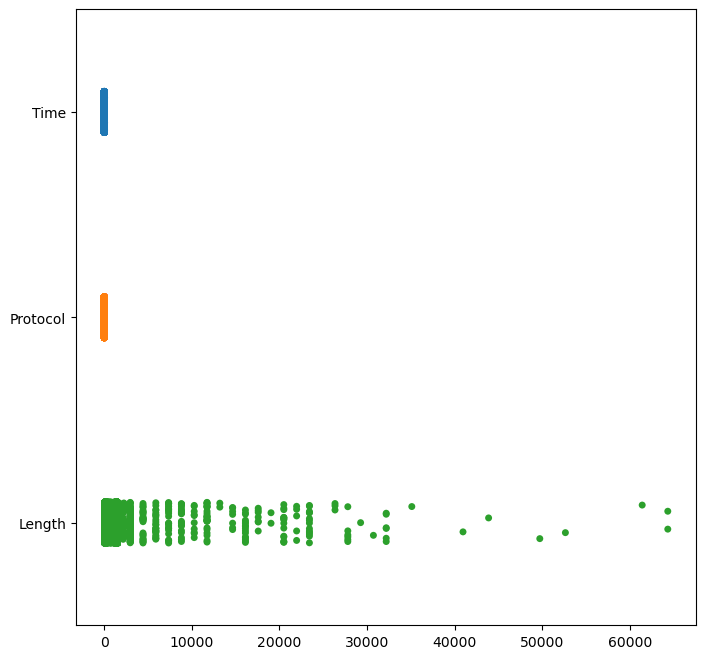

In [27]:
import seaborn as sns
plt.figure(figsize = [8,8])
sns.stripplot(data = pd.DataFrame(X_train), orient = 'h')
plt.show()

In [28]:
for i in range(2,10):
    knn = KNN(n_neighbors = i)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    acc = AS(y_pred,y_test)
    print("accuracy{i}:",acc)

accuracy{i}: 0.8189795255118621
accuracy{i}: 0.8269959917668724
accuracy{i}: 0.8186545336366591
accuracy{i}: 0.8163795905102372
accuracy{i}: 0.8087964467554978
accuracy{i}: 0.805763189253602
accuracy{i}: 0.8024049398765031
accuracy{i}: 0.799480012999675


In [16]:
X.shape

(27971, 3)

In [29]:
neighbor_range = np.array(range(2,10))

plt.figure(figsize=(6,6))
plt.plot(neighbor_range, Xtrain, ':xk', label='Training')
plt.plot(neighbor_range, xtest, ':xr', label='Testing')
plt.ylabel('Mean accuracy', fontsize=14)
plt.xlabel('$k$',fontsize=14)
plt.xticks(neighbor_range)
plt.legend()
plt.show()

NameError: name 'Xtrain' is not defined

<Figure size 600x600 with 0 Axes>